# Case 1 - Heart Disease Classification
Neural Networks for Health Technology Applications<br>
Jori Nordlund, Mikko Iivarinen, Mikko Puustinen<br>
Helsinki Metropolia University of Applied sciences<br>
01.02.2020

<h2>Background</h2>
<p>This document's purpose is to try and find a fast and efficient way to produce a neural network that can accurately say if a person has a heart disease based on data given to the network.<br><br>
Document includes the code for data processing and producing the neural network using Python 3 with Tensorflow and basic libraries.<br><br>
</p>

In [1]:
%pylab inline
import pandas as pd
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


## Data
### Basic information
The data was collected from the
Cleveland Clinic Foundation (cleveland.data).


### Attributes 
Attributes used:
1. Age (age)
- age in years
- numeric
- min = 29, max = 77, mean = 54.4
2. Sex (sex)
- '0' = female and '1' = male
- binary
3. Chest pain type (cp)
- types:
  1. Typical angina(1)
  2. Atypical angina(2)
  3. Non-anginal pain(3)
  4. Asymptomatic(4)
- categorical 
4. Resting blood pressure (trestbps)
- mmHg
- numeric
- min = 94, max = 200, mean = 131.7
5. Serum cholestoral (chol)
- mg/dl
- numeric
- min = 126, max = 564, mean = 246.7 
6. Fasting blood sugar (fbs)
- if fbs > 120 mg/dl value = '1' <br>else value = '0'
- binary
7. Resting electrocardiographic results (restecg)
- '0' = normal 
- '1' = ST-T wave abnormality
- '2' = showing propable or definite left ventricular hypertrophy by Estes' criteria
- categorical
8. Maximum heart rate achieved (thalach)
- numeric
- min = 71, max = 202, mean = 149.6
9. Exercise induced angina (exang)
- binary
10. ST depression induced by exercise relative to rest (oldpeak)
- numeric
- min = 0, max = 6.2, mean = 1.0
11. The slope of the peak exercise ST segment (slope)
- '1' = upsloping
- '2' = flat
- '3' = downsloping
- categorical
12. Number of major vessels
- 0 - 3 (numeric)
- min = 0, max = 3, mean = 0.7
13. Thallium heart scan (thal)
- '3' = normal
- '6' = fixed defect
- '7' = reversable defect
14. Diagnosis of heart disease (num)
- '0' < 50% diameter narrowing
- '1', '2', '3' and '4' > 50% diameter narrowing 
- categorical
- for the sake of this assignment all the values that differ from '0' are assigned to '1'

In [2]:
filename = r'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
df = pd.read_csv(filename,
                index_col = None,
                header = None,
                na_values='?')
df = df.fillna(0) # Replacing the missing values with '0'

for item in range(df[13].size): # Changing values of i >= 2 (0 <= i <= 4) to 1
    if df.iat[item, 13] >= 2: 
        df.iat[item, 13] = 1
        

df.tail() # Showing the last 5 samples of the dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,3.0,0


## Splitting data
- The dataset consists of 303 samples in total
- For the model training we used roughly 2/3 of the data (203 samples)
- For the validation we used 1/3 of the data (100 samples)

In [0]:
data_split = 100

data = df.loc[:, 0:12]
data = preprocessing.scale(data)
data_val = data[:data_split]
data_train = data[data_split:]


labels = df.loc[:,13]
labels_val = labels[:data_split]
labels_train = labels[data_split:]

## Neural network model
### Structure of the model
- One hidden layer:
  - 10 neurons
  - ReLU activation function
  - Dropout function with  dropout rate of 10%
- Output layer:
 - Sigmoid activation function

- Compiled with:
 - RMSprop optimizer
 - Loss is calculated with binary crossentropy
  - Metrics
    - Accuracy

### Training
At first we tried to compile a more complex neural network with multiple layers but with testing we came into the conclusion that the accuracy in this case was not very good with such a complex structure. <br>By trial and error we found that one hidden layer with the addition of Dropout-function was quite good in predicting the outcomes.<br>We used batch size of 30 and 40 epochs.


In [4]:
from __future__ import absolute_import, division, print_function, unicode_literals
model = tf.keras.models.Sequential([ # Defining the neural network
  tf.keras.layers.Dense(10, activation='relu', input_shape = (13,)),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [5]:
 history = model.fit(data_train, labels_train, batch_size= 30, epochs=40, validation_data=(data_val, labels_val)) # Training the model

Train on 203 samples, validate on 100 samples
Epoch 1/40
203/203 [==============================] - 0s 2ms/sample - loss: 0.7435 - acc: 0.5271 - val_loss: 0.7583 - val_acc: 0.5900
Epoch 2/40
203/203 [==============================] - 0s 124us/sample - loss: 0.7145 - acc: 0.5369 - val_loss: 0.7291 - val_acc: 0.6200
Epoch 3/40
203/203 [==============================] - 0s 94us/sample - loss: 0.6985 - acc: 0.5961 - val_loss: 0.7056 - val_acc: 0.6100
Epoch 4/40
203/203 [==============================] - 0s 89us/sample - loss: 0.6644 - acc: 0.6059 - val_loss: 0.6838 - val_acc: 0.6100
Epoch 5/40
203/203 [==============================] - 0s 94us/sample - loss: 0.6494 - acc: 0.6158 - val_loss: 0.6654 - val_acc: 0.6100
Epoch 6/40
203/203 [==============================] - 0s 134us/sample - loss: 0.6333 - acc: 0.6207 - val_loss: 0.6471 - val_acc: 0.6300
Epoch 7/40
203/203 [==============================] - 0s 95us/sample - loss: 0.6313 - acc: 0.6552 - val_loss: 0.6303 - val_acc: 0.6500
Epoch 8/

### Figure for the loss in each epoch

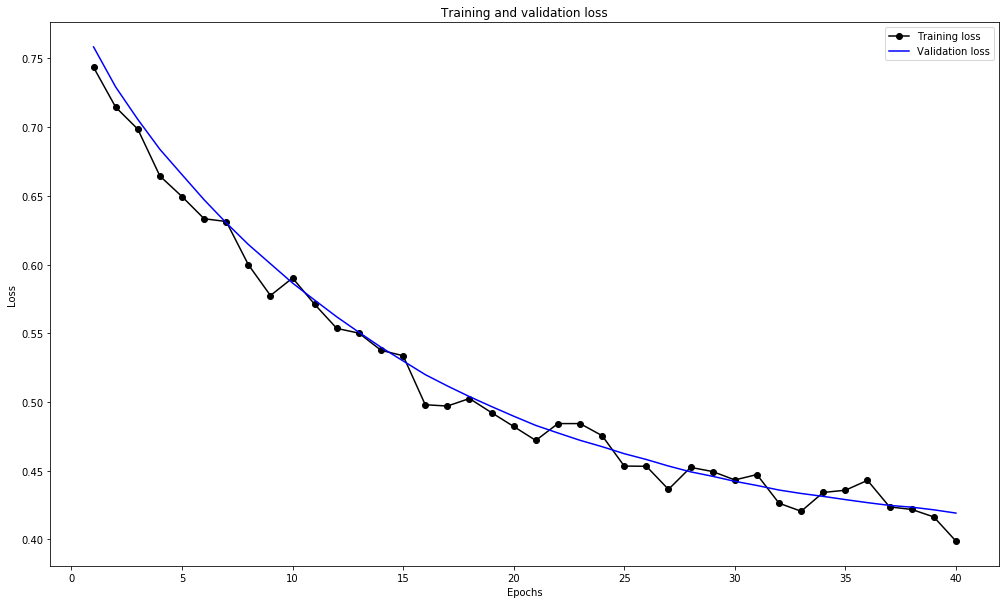

In [6]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(17,10))
plt.plot(epochs, loss, '-ok', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Figure for the accuracy in each epoch

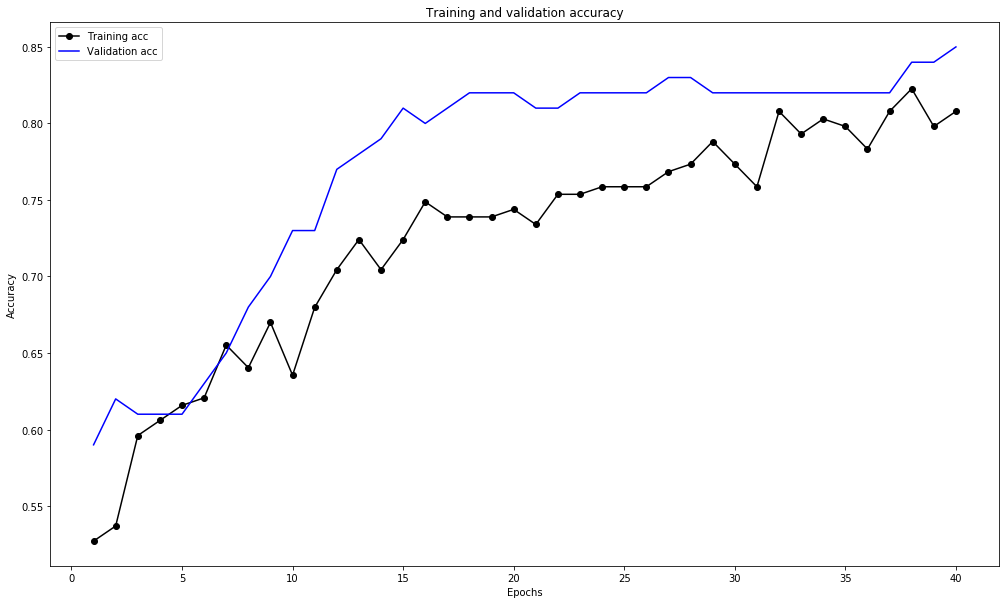

In [7]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.figure(figsize=(17,10))
plt.plot(epochs, acc, '-ok', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Results

We trained the model with 40 epochs and got a validation accuracy of approximately 84% and a training accuracy of approximately 80%. These values are close enough to each other for us to conclude that the model is not overtrained on the dataset.

Above are two graphs. The first describes the value off the loss function in the training and validation data and the second describes the accuracy of both the validation and training sets. Both of the graphs display a similar development in the values for the training and validation datasets which shows that the model is working.


# Conclusions

In conclusion our model can reach a validation accuracy of 84% which means it can be fairly reliably used as a helping hand in categorizing heart disease patients. The accuracy could most likely be improved by some amount by providing a larger dataset to train the model with. Taking into account the size of the dataset we are satisfied with the achieved accuracy.